In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Folder where all the demonstration files are stored
folder_path = '/home/yigit/projects/pemp/data/xarm/raw/'

# Initialize an empty DataFrame to store combined data
all_data = []
raw_freqs = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # Load the CSV file
        data = pd.read_csv(file_path).to_numpy()

        raw_freqs.append(int(file_name.split('_')[0]))
        all_data.append(data)

In [19]:
num_trajs = len(all_data)
t_steps = 400  # Desired length after interpolation
dy = all_data[0].shape[1]  # Dimensionality of the data

interp_data = np.zeros((num_trajs, t_steps, dy))

# interpolate to the same length
for i in range(num_trajs):
    for j in range(dy):
        interp_data[i][:, j] = np.interp(np.linspace(0, 1, t_steps), np.linspace(0, 1, all_data[i].shape[0]), all_data[i][:, j])

Text(0.5, 1.0, 'Stirring Demonstration Data')

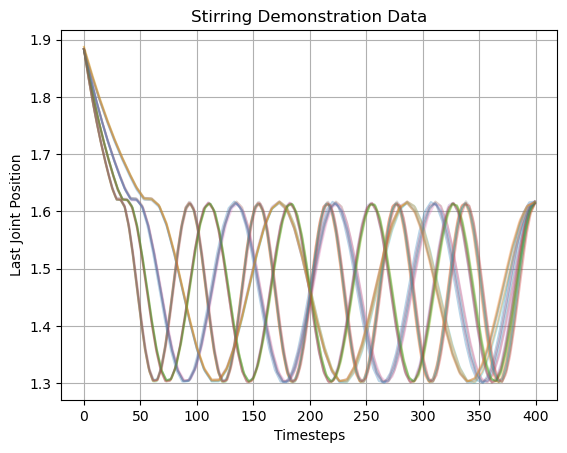

In [20]:
plt.grid()

for i in range(num_trajs):
    plt.plot(interp_data[i][:, -4], alpha=0.3)

plt.xlabel('Timesteps')
plt.ylabel('Last Joint Position')
plt.title('Stirring Demonstration Data')

In [21]:
# save the interpolated data
np.save(f'processed/raw_{t_steps}.npy', interp_data)

In [ ]:
# *********** NORMALIZATION ***********
norm_data = interp_data / (2*np.pi)
freqs = np.array(raw_freqs) / max(raw_freqs)

# save normalized data
np.save(f'processed/norm_{t_steps}.npy', norm_data)
np.save(f'processed/freqs_{t_steps}.npy', freqs)

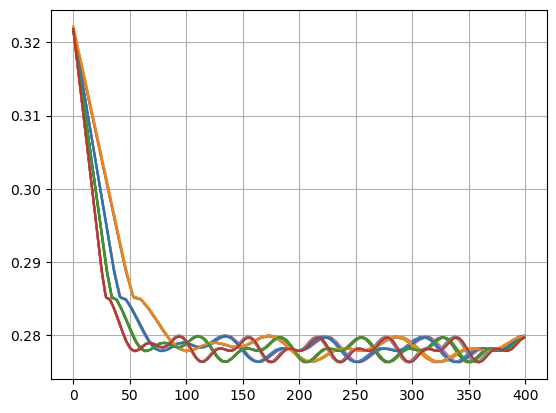

In [24]:
for i in range(num_trajs):
    plt.plot(norm_data[i][:, -2])
plt.grid()